# Chapter 5: Support Vector Machines

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import seaborn as sns
from pathlib import Path

In [91]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Soft Margin Classification

In [92]:
iris = load_iris(as_frame=True)
features = ['petal length (cm)', 'petal width (cm)']
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = (iris.target == 2)

svm_clf = make_pipeline(
	StandardScaler(), 
	LinearSVC(C=1, random_state=42))

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [93]:
X_new = pd.DataFrame([[5.5, 1.7], [5.0, 1.5]], columns=features)
svm_clf.predict(X_new)

array([ True, False])

In [94]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

## Non Linear SVM Classification

In [95]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

svm_clf_poly = make_pipeline(
	PolynomialFeatures(degree=3),
	StandardScaler(),
	LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
	)


svm_clf_poly.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

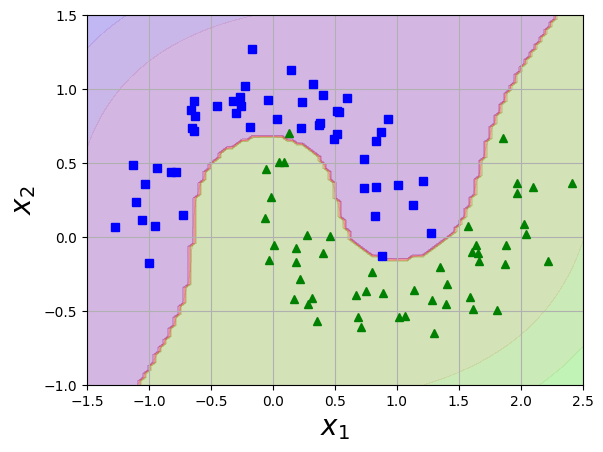

In [96]:
def plot_dataset(X, y, axes):
	plt.plot(X[y==0, 0], X[y==0, 1], "bs")
	plt.plot(X[y==1, 0], X[y==1, 1], "g^")
	plt.axis(axes)
	plt.grid(True, which='both')
	plt.xlabel(r"$x_1$", fontsize=20)
	plt.ylabel(r"$x_2$", fontsize=20)

def plot_contours(clf, axes):
	x0s = np.linspace(axes[0], axes[1], 100)
	x1s = np.linspace(axes[2], axes[3], 100)
	x0, x1 = np.meshgrid(x0s, x1s)
	X = np.c_[x0.ravel(), x1.ravel()]
	y_pred = clf.predict(X).reshape(x0.shape)
	y_decision = clf.decision_function(X).reshape(x0.shape)
	plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
	plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_contours(svm_clf_poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Polynomial Kernel

In [97]:
from sklearn.svm import SVC

svm_poly_kernel_clf = make_pipeline(
	StandardScaler(),
	SVC(kernel='poly', degree=3, coef0=1, C=5)
	)

svm_poly_kernel_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

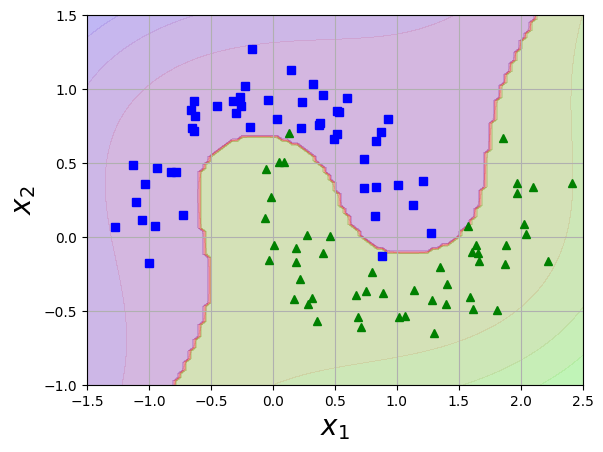

In [98]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_contours(svm_poly_kernel_clf, [-1.5, 2.5, -1, 1.5])

## Gaussian RBF Kernel

Gaussian RBF is a measure of similarity between instances and a reference point (or landmark). The function is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). The similarity function is defined as:

\begin{equation}
\phi_{\gamma}(\mathbf{x}, \ell) = \exp(-\gamma \|\mathbf{x} - \ell\|^2)
\end{equation}

where $\gamma$ is a hyperparameter that controls the width of the bell-shaped curve.

Text(0.5, 1.0, '$\\gamma$ values')

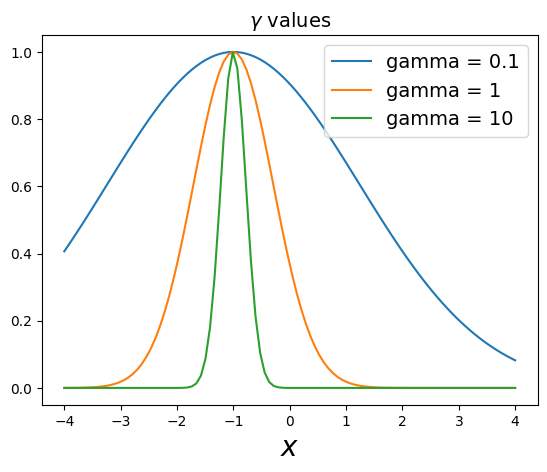

In [ ]:
## We can take a look at the gaussian rbf function

def gaussian_rbf(x, landmark, gamma):
	return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)


landmark = -1
gammas = [0.1, 1, 10]
x_rbf = np.linspace(-4, 4, 100).reshape(-1, 1)

for gamma in gammas:
	y_rbf = gaussian_rbf(x_rbf, landmark, gamma)
	plt.plot(x_rbf, y_rbf, label=f'gamma = {gamma}')

plt.xlabel(r"$x$", fontsize=20)
plt.legend(loc='upper right')
plt.title(r"$\gamma$ values")

In [ ]:
## Adding "similarity features" using the Gaussian RBF kernel

svm_clf_rbf = make_pipeline(
	StandardScaler(),
	SVC(kernel='rbf', gamma=5, C=0.001)
	)

svm_clf_rbf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

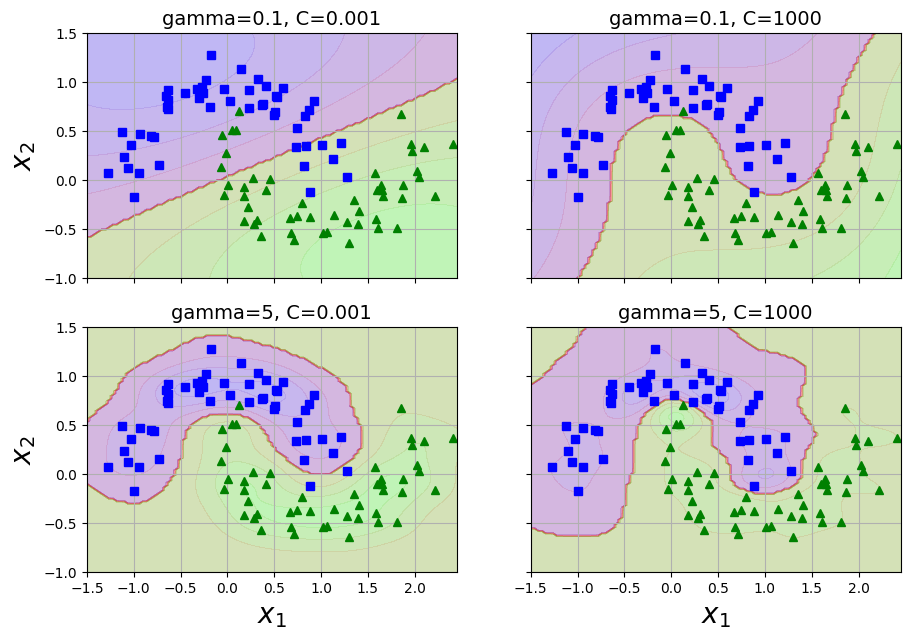

In [ ]:
## From colab
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_contours(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

## SVM Regression

In [237]:
from sklearn.svm import LinearSVR, SVR

X = np.linspace(-4, 4, 100).reshape(-1, 1)
y_linear = X + 1 + np.random.normal(0, 2, size=X.shape)
y_poly = X**2 + 1 + np.random.normal(0, 1, size=X.shape)

svm_reg = make_pipeline(
	StandardScaler(),
	LinearSVR(epsilon=1, random_state=42)
	)

svm_reg_poly = make_pipeline(

	StandardScaler(),
	SVR(kernel='poly', degree=2, epsilon=1)
)

svm_reg.fit(X, y_linear.ravel())
svm_reg_poly.fit(X, y_poly.ravel())

y_pred_linear = svm_reg.predict(X)
y_pred_poly = svm_reg_poly.predict(X)